      Date            Open              High             Low         
 1/10/00:    1   Min.   :  52.20   Min.   :  52.2   Min.   :  51.35  
 1/10/01:    1   1st Qu.:  99.95   1st Qu.: 100.7   1st Qu.:  99.16  
 1/10/02:    1   Median : 317.31   Median : 319.3   Median : 315.26  
 1/10/03:    1   Mean   : 646.09   Mean   : 650.0   Mean   : 642.01  
 1/10/05:    1   3rd Qu.:1157.51   3rd Qu.:1166.4   3rd Qu.:1147.99  
 1/10/06:    1   Max.   :2867.23   Max.   :2872.9   Max.   :2851.48  
 (Other):14676                                                       
     Close             Volume            Adj.Close      
 Min.   :  52.20   Min.   :1.890e+06   Min.   :  52.20  
 1st Qu.:  99.95   1st Qu.:1.780e+07   1st Qu.:  99.95  
 Median : 317.52   Median :1.647e+08   Median : 317.52  
 Mean   : 646.24   Mean   :1.062e+09   Mean   : 646.24  
 3rd Qu.:1157.98   3rd Qu.:1.488e+09   3rd Qu.:1157.98  
 Max.   :2872.87   Max.   :1.146e+10   Max.   :2872.87  
                                         

[1] "Date"      "Open"      "High"      "Low"       "Close"     "Volume"   
[7] "Adj.Close"

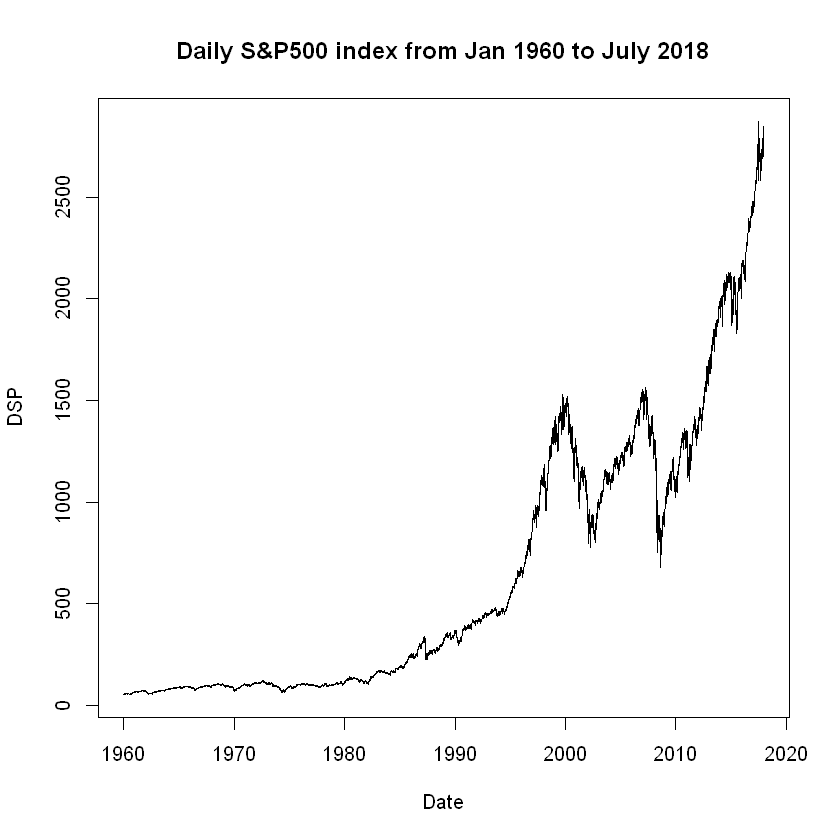

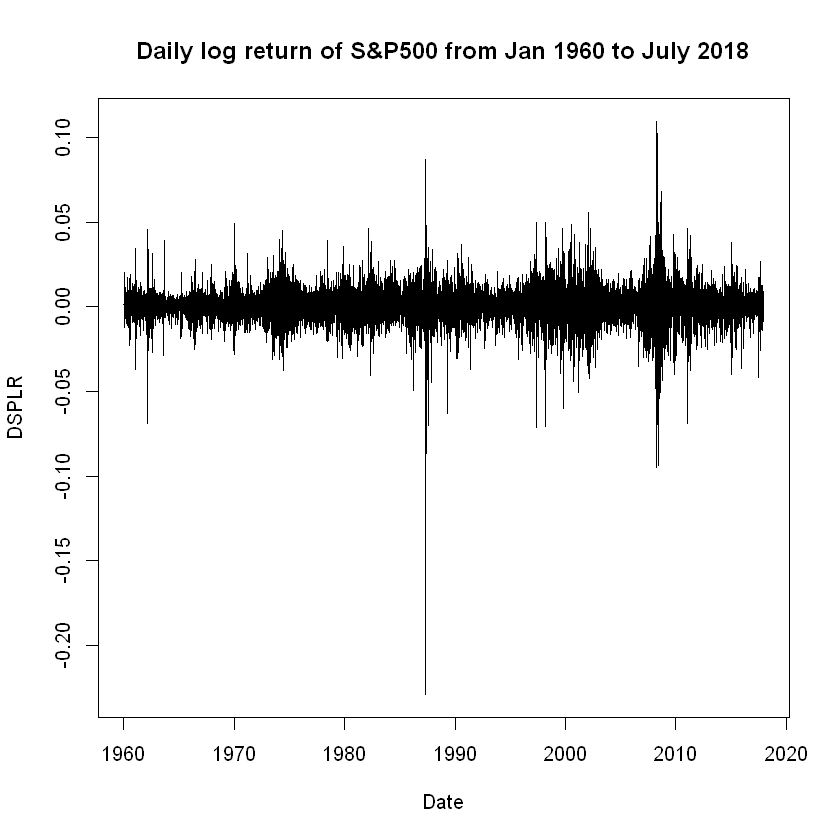

Warning message in file(file, "rt"):
"无法打开文件'Citi_13Jan.txt': No such file or directory"

ERROR: Error in file(file, "rt"): 无法打开链结


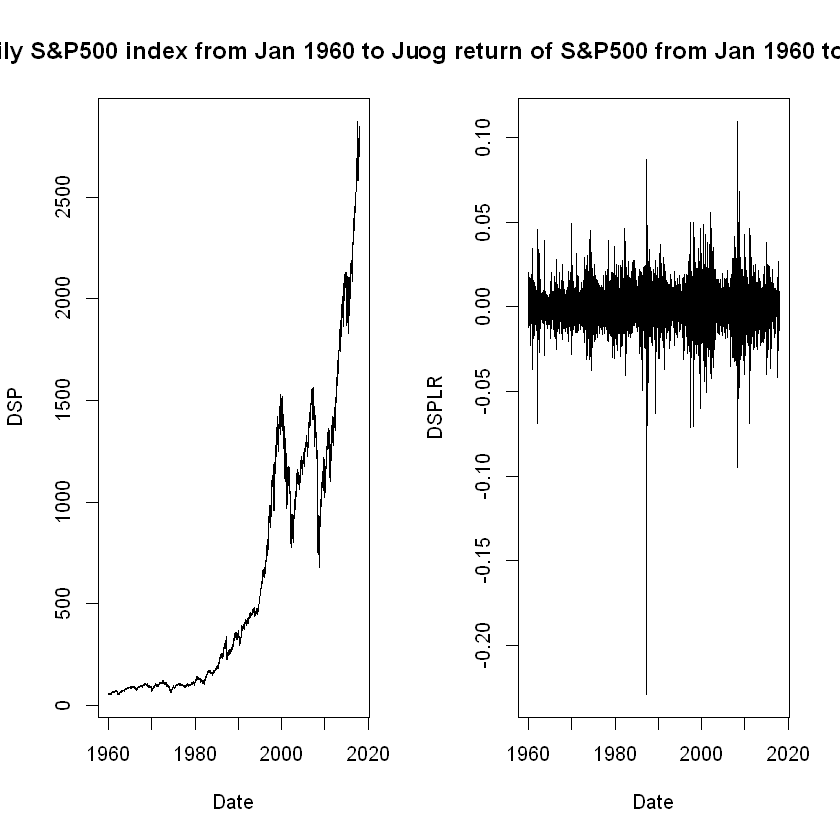

In [1]:
rm(list = ls())
setwd("...")  # set directory


SP500 <- read.table("DSP500.csv",header = T, sep=",")

attach(SP500)
summary(SP500)
names(SP500)

DSP<-rev(SP500$Close)

DSP_time<- seq(from=1960,to=2018,length.out=length(DSP)) 

plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")

DSPLR <- diff(log(DSP))  # compute log returns; 
                         # try help(diff) for the usage of diff

plot(DSP_time[2:length(DSP)], DSPLR,type="l",xlab="Date",main="Daily log return of S&P500 from Jan 1960 to July 2018")

par(mfrow=c(1,2))  
# divide the plotting area into 1 by 2 to facilitate comparison 
plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")
plot(DSP_time[1:length(DSPLR)], DSPLR,type="l",xlab="Date",main="Daily log return of S&P500 from Jan 1960 to July 2018")

qqnorm(DSPLR, main="Normal QQ plot of DSLPR")

###################
Citi<-read.table("Citi_13Jan.txt",head=T)
attach(Citi)
head(Citi)

price <- as.numeric(as.character(PRICE))
t<-as.character(TIME)
t<-strptime(t,"%H:%M:%S")

summary(t)
summary(price)

plot(t,price,type="l",xlab="Time",main="Price of Citi on Jan 2, 2013")


par(mfrow=c(1,2))
plot(DSP_time,DSP,type="l",xlab="Date",main="Daily S&P500 index from Jan 1960 to July 2018")
plot(t,price,type="l",xlab="Time",main="Price of Citi on Jan 2, 2013")


# next compute minute-by-minute returns
Dt<-60 #every 6 sec

tn<-as.numeric(difftime(t,t[1],units="secs")) #t numeric, tn[1]=0
b<-floor(tn/Dt)
FirstPerDt<- b - c(-1,b[-length(b)]) #nonzero entries are the first ones per Dt

price_60sec <- price[FirstPerDt != 0]
tn1_60sec<-tn[FirstPerDt != 0]

Citi_LR60sec <- diff(log(price_60sec))  # compute log returns; 

plot(tn1_60sec[-1], Citi_LR60sec,type="l",xlab="Time",main="Intraday minute-by-minute returns of Citi on Jan 2, 2013")

par(mfrow=c(1,1))  
hist(Citi_LR60sec[Citi_LR60sec < 0.004], freq = F, main="Histogram of Citi minute-by-minute returns")  

qqnorm(Citi_LR60sec[Citi_LR60sec < 0.004], main="Normal QQ plot of Citi minute-by-minute returns")

hist(DSPLR, breaks = 50, freq = F, main="Histogram of DSPLR")   


################# Coffee data
library(Rsafd)

data(BCofLRet)
data(CCofLRet)

CofLR <- cbind(BCofLRet,CCofLRet)

summary(BCofLRet)
summary(CCofLRet)

plot(BCofLRet,CCofLRet)

##### BH vs SP
BH_SP <- read.table("SP_BH.CSV",head=T, sep=",")
attach(BH_SP)
head(BH_SP)
SP <- BH_SP$SP
BH <- BH_SP$BH

SP_rtn <- diff(log(SP))
BH_rtn <- diff(log(BH))

par(mfrow=c(1,1))
plot(SP, BH,main="BH price vs SP500 index")
plot(SP_rtn, BH_rtn,main="BH return vs SP500 return")
